In [48]:
import os

# Function to count the total number of classes and images in a directory
def count_classes_and_images(directory):
    """
    Count the total number of classes and images in the directory.
    """
    total_classes = 0
    total_images = 0
    for class_name in os.listdir(directory):
        class_dir = os.path.join(directory, class_name)
        if os.path.isdir(class_dir):
            total_classes += 1
            total_images += len(os.listdir(class_dir))
    return total_classes, total_images

# Directory paths for train, test, and validation sets
train_dir = "python/data/train"  # Update with the path to your train set directory
test_dir = "python/data/test"    # Update with the path to your test set directory
val_dir = "python/data/val"      # Update with the path to your validation set directory

# Count total classes and images in each set
train_classes, total_train_images = count_classes_and_images(train_dir)
test_classes, total_test_images = count_classes_and_images(test_dir)
val_classes, total_val_images = count_classes_and_images(val_dir)

# Print total classes and images in each set
print("Train set:")
print("  Total classes:", train_classes)
print("  Total images:", total_train_images)
print("Test set:")
print("  Total classes:", test_classes)
print("  Total images:", total_test_images)
print("Validation set:")
print("  Total classes:", val_classes)
print("  Total images:", total_val_images)


Train set:
  Total classes: 16
  Total images: 12378
Test set:
  Total classes: 16
  Total images: 4141
Validation set:
  Total classes: 16
  Total images: 4122


In [62]:
# Print class names from the train generator
print("Class names from train generator:")
print(train_generator.class_indices)

# Print class names from the validation generator
print("\nClass names from validation generator:")
print(valid_generator.class_indices)

# Print class names from the test generator
print("\nClass names from test generator:")
print(test_generator.class_indices)


Class names from train generator:
{'Pepper__bell___Bacterial_spot': 0, 'Pepper__bell___healthy': 1, 'PlantVillage': 2, 'Potato___Early_blight': 3, 'Potato___Late_blight': 4, 'Potato___healthy': 5, 'Tomato_Bacterial_spot': 6, 'Tomato_Early_blight': 7, 'Tomato_Late_blight': 8, 'Tomato_Leaf_Mold': 9, 'Tomato_Septoria_leaf_spot': 10, 'Tomato_Spider_mites_Two_spotted_spider_mite': 11, 'Tomato__Target_Spot': 12, 'Tomato__Tomato_YellowLeaf__Curl_Virus': 13, 'Tomato__Tomato_mosaic_virus': 14, 'Tomato_healthy': 15}

Class names from validation generator:
{'Pepper__bell___Bacterial_spot': 0, 'Pepper__bell___healthy': 1, 'PlantVillage': 2, 'Potato___Early_blight': 3, 'Potato___Late_blight': 4, 'Potato___healthy': 5, 'Tomato_Bacterial_spot': 6, 'Tomato_Early_blight': 7, 'Tomato_Late_blight': 8, 'Tomato_Leaf_Mold': 9, 'Tomato_Septoria_leaf_spot': 10, 'Tomato_Spider_mites_Two_spotted_spider_mite': 11, 'Tomato__Target_Spot': 12, 'Tomato__Tomato_YellowLeaf__Curl_Virus': 13, 'Tomato__Tomato_mosaic_viru

Sample images from the train set:


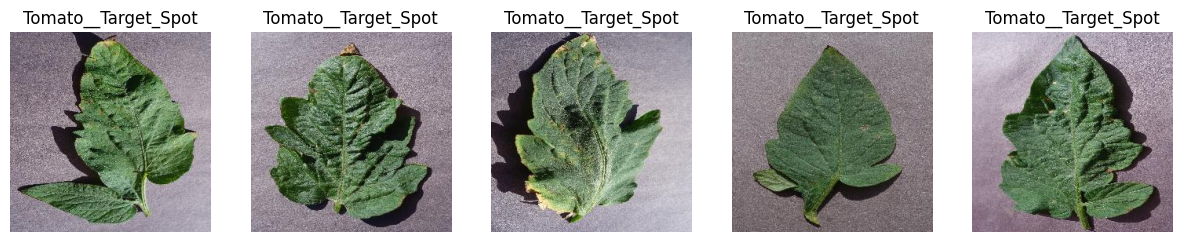

Sample images from the test set:


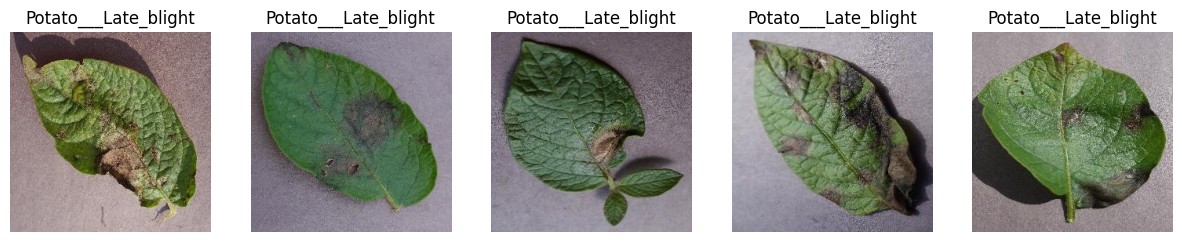

Sample images from the validation set:


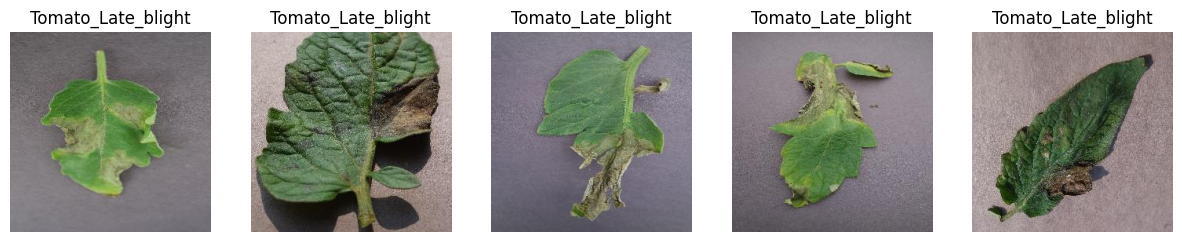

In [55]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# Function to display a sample of images from a directory
def display_sample_images(directory, num_images=5):
    """
    Display a sample of images from a directory.
    """
    # List subdirectories (classes) in the directory
    classes = os.listdir(directory)
    # Randomly select a class
    class_name = random.choice(classes)
    class_dir = os.path.join(directory, class_name)
    class_images = os.listdir(class_dir)
    # Select a random sample of images
    sample_images = random.sample(class_images, min(num_images, len(class_images)))
    # Display the sample images
    plt.figure(figsize=(15, 5))
    for i, image_file in enumerate(sample_images, 1):
        image_path = os.path.join(class_dir, image_file)
        img = mpimg.imread(image_path)
        plt.subplot(1, num_images, i)
        plt.imshow(img)
        plt.axis('off')
        plt.title(class_name)
    plt.show()

# Directory paths for train, test, and validation sets
train_dir = "python/data/train"  # Update with the path to your train set directory
test_dir = "python/data/test"    # Update with the path to your test set directory
val_dir = "python/data/val"      # Update with the path to your validation set directory

# Display sample images from each set
print("Sample images from the train set:")
display_sample_images(train_dir)
print("Sample images from the test set:")
display_sample_images(test_dir)
print("Sample images from the validation set:")
display_sample_images(val_dir)


In [6]:
#### import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Constants
img_width, img_height = 224, 224
num_classes = 16  # Update this to match the number of classes in your dataset
batch_size = 32

# Data generators with advanced data augmentation for train set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Data generator without augmentation for validation and test sets
valid_test_datagen = ImageDataGenerator(rescale=1./255)

# Define CNN model
model = Sequential([
    Conv2D(128, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()

# Prepare data generators for train, validation, and test sets
train_generator = train_datagen.flow_from_directory(
    "python/data/train",
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

valid_generator = valid_test_datagen.flow_from_directory(
    "python/data/val",
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = valid_test_datagen.flow_from_directory(
    "python/data/test",
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

# Define callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True),
    ModelCheckpoint(filepath='best_model.keras', monitor='val_loss', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1)
]

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=20,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // batch_size,
    callbacks=callbacks
)

# Extract training, validation, and test accuracy from history object
train_accuracy = history.history['accuracy'][-1] * 100  # Train accuracy as percentage
val_accuracy = history.history['val_accuracy'][-1] * 100  # Validation accuracy as percentage

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
test_accuracy_percentage = test_accuracy * 100  # Test accuracy as percentage


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │         4,112 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,738,672 (10.45 MB)

 Trainable params: 2,738,672 (10.45 MB)

 Non-trainable params: 0 (0.00 B)

Found 12378 images belonging to 16 classes.
Found 4121 images belonging to 16 classes.
Found 4141 images belonging to 16 classes.
Epoch 1/20


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


386/386 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.2147 - loss: 2.4246
Epoch 1: val_loss improved from inf to 1.68664, saving model to best_model.keras
386/386 ━━━━━━━━━━━━━━━━━━━━ 1250s 3s/step - accuracy: 0.2149 - loss: 2.4240 - val_accuracy: 0.4395 - val_loss: 1.6866 - learning_rate: 0.0010
Epoch 2/20
  1/386 ━━━━━━━━━━━━━━━━━━━━ 21:15 3s/step - accuracy: 0.4375 - loss: 1.6250

2024-04-17 10:27:39.255616: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)



Epoch 2: val_loss improved from 1.68664 to 0.79503, saving model to best_model.keras
386/386 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4375 - loss: 0.8146 - val_accuracy: 0.3200 - val_loss: 0.7950 - learning_rate: 0.0010
Epoch 3/20


2024-04-17 10:27:40.061864: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


386/386 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.4551 - loss: 1.6496
Epoch 3: val_loss did not improve from 0.79503
386/386 ━━━━━━━━━━━━━━━━━━━━ 1642s 4s/step - accuracy: 0.4552 - loss: 1.6492 - val_accuracy: 0.5686 - val_loss: 1.2717 - learning_rate: 0.0010
Epoch 4/20
  1/386 ━━━━━━━━━━━━━━━━━━━━ 28:16 4s/step - accuracy: 0.5000 - loss: 1.3153

2024-04-17 10:55:06.867892: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 4: val_loss improved from 0.79503 to 0.65616, saving model to best_model.keras
386/386 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5000 - loss: 0.6594 - val_accuracy: 0.6400 - val_loss: 0.6562 - learning_rate: 0.0010
Epoch 5/20


2024-04-17 10:55:08.010798: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


386/386 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.6081 - loss: 1.1560
Epoch 5: val_loss did not improve from 0.65616
386/386 ━━━━━━━━━━━━━━━━━━━━ 1885s 5s/step - accuracy: 0.6082 - loss: 1.1558 - val_accuracy: 0.7285 - val_loss: 0.8033 - learning_rate: 0.0010
Epoch 6/20
  1/386 ━━━━━━━━━━━━━━━━━━━━ 20:16 3s/step - accuracy: 0.6875 - loss: 0.9664

2024-04-17 11:26:36.748597: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 6: val_loss improved from 0.65616 to 0.36801, saving model to best_model.keras
386/386 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6875 - loss: 0.4844 - val_accuracy: 0.7600 - val_loss: 0.3680 - learning_rate: 0.0010
Epoch 7/20


2024-04-17 11:26:37.507284: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


386/386 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6854 - loss: 0.9418
Epoch 7: val_loss did not improve from 0.36801
386/386 ━━━━━━━━━━━━━━━━━━━━ 1470s 4s/step - accuracy: 0.6855 - loss: 0.9416 - val_accuracy: 0.6404 - val_loss: 1.1960 - learning_rate: 0.0010
Epoch 8/20
  1/386 ━━━━━━━━━━━━━━━━━━━━ 22:47 4s/step - accuracy: 0.7812 - loss: 0.8790

2024-04-17 11:51:10.977139: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 8: val_loss did not improve from 0.36801
386/386 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7812 - loss: 0.4407 - val_accuracy: 0.6000 - val_loss: 0.6521 - learning_rate: 0.0010
Epoch 9/20


2024-04-17 11:51:11.866163: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


386/386 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7443 - loss: 0.7653
Epoch 9: val_loss did not improve from 0.36801
386/386 ━━━━━━━━━━━━━━━━━━━━ 1395s 4s/step - accuracy: 0.7443 - loss: 0.7653 - val_accuracy: 0.7441 - val_loss: 0.7689 - learning_rate: 0.0010
Epoch 10/20
  1/386 ━━━━━━━━━━━━━━━━━━━━ 24:55 4s/step - accuracy: 0.8750 - loss: 0.5070

2024-04-17 12:14:30.695894: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 10: val_loss improved from 0.36801 to 0.36746, saving model to best_model.keras
386/386 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8750 - loss: 0.2541 - val_accuracy: 0.7600 - val_loss: 0.3675 - learning_rate: 0.0010
Epoch 11/20


2024-04-17 12:14:31.665045: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


386/386 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7745 - loss: 0.6603
Epoch 11: val_loss did not improve from 0.36746
386/386 ━━━━━━━━━━━━━━━━━━━━ 1527s 4s/step - accuracy: 0.7745 - loss: 0.6602 - val_accuracy: 0.7839 - val_loss: 0.6830 - learning_rate: 0.0010
Epoch 12/20
  1/386 ━━━━━━━━━━━━━━━━━━━━ 22:25 3s/step - accuracy: 0.8750 - loss: 0.4075

2024-04-17 12:40:01.969648: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 12: val_loss improved from 0.36746 to 0.28747, saving model to best_model.keras
386/386 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8750 - loss: 0.2043 - val_accuracy: 0.6800 - val_loss: 0.2875 - learning_rate: 0.0010
Epoch 13/20


2024-04-17 12:40:02.817964: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


386/386 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8042 - loss: 0.5752
Epoch 13: val_loss did not improve from 0.28747
386/386 ━━━━━━━━━━━━━━━━━━━━ 1525s 4s/step - accuracy: 0.8042 - loss: 0.5752 - val_accuracy: 0.7043 - val_loss: 1.3339 - learning_rate: 0.0010
Epoch 14/20
  1/386 ━━━━━━━━━━━━━━━━━━━━ 21:35 3s/step - accuracy: 0.7188 - loss: 1.1556

2024-04-17 13:05:31.729045: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 14: val_loss did not improve from 0.28747
386/386 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7188 - loss: 0.5793 - val_accuracy: 0.8000 - val_loss: 0.4246 - learning_rate: 0.0010
Epoch 15/20


2024-04-17 13:05:32.545807: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


386/386 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8184 - loss: 0.5330
Epoch 15: val_loss did not improve from 0.28747
386/386 ━━━━━━━━━━━━━━━━━━━━ 1477s 4s/step - accuracy: 0.8184 - loss: 0.5330 - val_accuracy: 0.7681 - val_loss: 0.7253 - learning_rate: 0.0010
Epoch 16/20
  1/386 ━━━━━━━━━━━━━━━━━━━━ 26:05 4s/step - accuracy: 0.8125 - loss: 0.5565

2024-04-17 13:30:14.080988: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 16: val_loss did not improve from 0.28747
386/386 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8125 - loss: 0.2790 - val_accuracy: 0.8000 - val_loss: 0.4665 - learning_rate: 0.0010
Epoch 17/20


2024-04-17 13:30:15.115826: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


386/386 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8471 - loss: 0.4597
Epoch 17: val_loss did not improve from 0.28747

Epoch 17: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
386/386 ━━━━━━━━━━━━━━━━━━━━ 1516s 4s/step - accuracy: 0.8471 - loss: 0.4597 - val_accuracy: 0.8354 - val_loss: 0.4922 - learning_rate: 0.0010
Epoch 17: early stopping
Restoring model weights from the end of the best epoch: 12.
130/130 ━━━━━━━━━━━━━━━━━━━━ 147s 1s/step - accuracy: 0.7921 - loss: 0.6741
Train Accuracy: 84.87%
Validation Accuracy: 83.54%
Test Accuracy: 78.70%


In [50]:
print(f"Train Accuracy: {train_accuracy:.2f}%")
print(f"Validation Accuracy: {val_accuracy:.2f}%")
print(f"Test Accuracy: {test_accuracy_percentage:.2f}%")

Train Accuracy: 84.87%
Validation Accuracy: 83.54%
Test Accuracy: 78.70%


In [37]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the test set
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true class labels
true_classes = test_generator.classes

# Get class labels from the generator
class_labels = list(test_generator.class_indices.keys())

# Generate classification report
class_report = classification_report(true_classes, y_pred_classes, labels=np.arange(len(class_labels)), target_names=class_labels)

# Generate confusion matrix
conf_matrix = confusion_matrix(true_classes, y_pred_classes)


130/130 ━━━━━━━━━━━━━━━━━━━━ 123s 948ms/step


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _

In [49]:
conf_matrix

array([[17, 18,  9, 10,  1, 21,  6, 16, 13, 16, 10, 13, 23,  4, 24],
       [11, 23, 17, 16,  0, 26, 25, 28,  4, 26, 21, 18, 37,  9, 37],
       [11, 22, 10,  9,  1, 14, 12, 23,  7, 13, 10, 12, 25,  5, 26],
       [12, 20,  8,  7,  0, 20, 11, 18,  7, 11, 13,  7, 34,  4, 28],
       [ 1,  3,  3,  0,  0,  5,  2,  5,  0,  0,  2,  3,  5,  0,  2],
       [23, 34, 30, 13,  1, 31, 14, 46, 22, 40, 27, 32, 60,  7, 46],
       [ 6,  7,  5,  7,  1, 21,  8, 21,  8, 14, 14, 21, 35,  9, 23],
       [21, 24, 23, 16,  2, 34, 11, 39, 13, 30, 27, 32, 47, 10, 54],
       [ 9, 12, 10,  6,  1, 19,  5, 20,  8, 20, 15, 12, 22,  8, 24],
       [15, 24, 19, 19,  2, 27, 18, 40,  7, 32, 19, 29, 53,  7, 44],
       [16, 31, 16, 12,  0, 24, 11, 37, 16, 28, 19, 25, 52,  8, 41],
       [10, 11, 22,  7,  3, 27,  8, 28, 10, 29, 19, 25, 36, 11, 36],
       [28, 49, 37, 21,  1, 56, 16, 69, 28, 50, 50, 59, 85, 14, 80],
       [ 1,  7,  2,  2,  0,  6,  4,  6,  5,  4,  7,  9, 12,  3,  8],
       [12, 21, 15, 14,  3, 27, 16

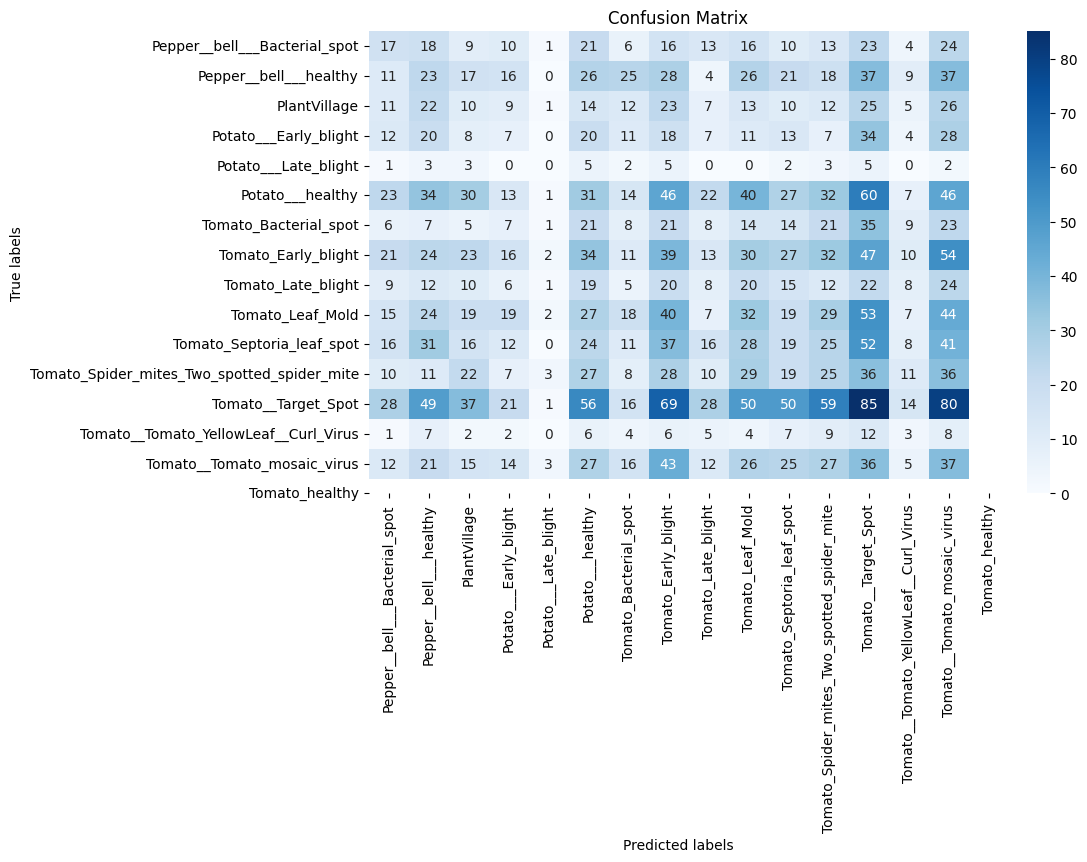

In [39]:
# Plot confusion matrix
plt.figure(figsize=(10,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [40]:
# Print classification report
print("Classification Report:")
print(class_report)

Classification Report:
                                             precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       0.09      0.08      0.09       201
                     Pepper__bell___healthy       0.08      0.08      0.08       298
                               PlantVillage       0.00      0.00      0.00         0
                      Potato___Early_blight       0.04      0.05      0.05       200
                       Potato___Late_blight       0.04      0.04      0.04       200
                           Potato___healthy       0.00      0.00      0.00        31
                      Tomato_Bacterial_spot       0.09      0.07      0.08       426
                        Tomato_Early_blight       0.05      0.04      0.04       200
                         Tomato_Late_blight       0.09      0.10      0.09       383
                           Tomato_Leaf_Mold       0.05      0.04      0.05       191
                  Tomato_Septoria_leaf_sp

In [32]:
import numpy as np
import tensorflow as tf
from PIL import Image
def MakePrediction(file_path, model, classes):
    img_open = Image.open(file_path)
    img_open = img_open.resize((224, 224))  # Resize the image to match the expected input shape
    
    img_arr = np.array(img_open)
    
    # Preprocess the image array as needed by your model
    img_arr = tf.keras.applications.densenet.preprocess_input(img_arr)
    img_arr = np.array([img_arr])
    
    pred = model.predict(img_arr)
    max_element = float(np.max(pred)*100) 
    print(pred)
    print(max_element)
    category = classes[np.argmax(pred)]
    return category, max_element


In [33]:
file_path = "python/data/test/Potato___Early_blight/0267d4ca-522e-4ca0-b1a2-ce925e5b54a2___RS_Early.B 7020.JPG"
category, confidence = MakePrediction(file_path, model,'Potato___Early_blight' )
print("Predicted Category:", category)
print("Confidence:", confidence)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
100.0
Predicted Category: _
Confidence: 100.0
